# Question Two



#### Part I

In [5]:
x = [1:15;]
y = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 26 2.06 23 1.58 2.17 0.02]

xDrop = [1 2 3 4 5 6 7 8 9 11 13 14 15]
yDrop = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 2.06 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

# include the outliers
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, a1)
@variable(m, b1)

@objective(m, Min, sum{(y[i]-a1*x[i]-b1)^2, i=1:15})

solve(m)

a1 = getvalue(a1)
b1 = getvalue(b1)

# our final values -- w/ drop values
println("best fit of least square(include the outliers):")
println("a1:", a1)
println("b1:", b1)

println()

# exclude the outliers
n = Model(solver=GurobiSolver(OutputFlag=0))

@variable(n, a2)
@variable(n, b2)

@objective(n, Min, sum{(yDrop[i]-a2*xDrop[i]-b2)^2, i=1:13})

solve(n)

a2 = getvalue(a2)
b2 = getvalue(b2)

# our final values -- w/o drop values
println("best fit of least square(exclude the outliers):")
println("a2:", a2)
println("b2:", b2)

Academic license - for non-commercial use only
best fit of least square(include the outliers):
a1:0.20171428571419991
b1:4.3816190476177965

Academic license - for non-commercial use only
best fit of least square(exclude the outliers):
a2:-0.26680023923439117
b2:5.159724880381779


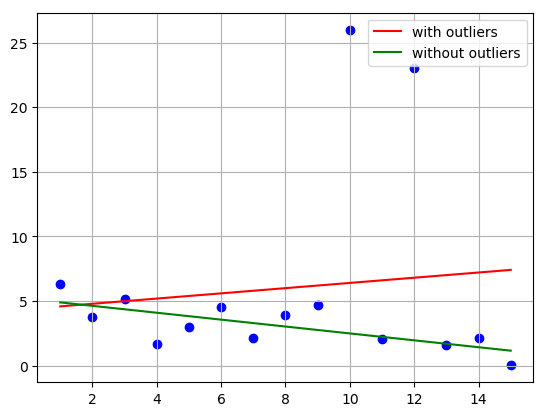

PyObject <matplotlib.legend.Legend object at 0x7f75e1f29e10>

In [6]:
scatter(x, y, color="blue")
plot(x, a1'*x.+b1, color="red", label="with outliers")
plot(x, a2'*x.+b2, color="green", label="without outliers")
grid()
legend()

Our red line is weighted with our outliers. And as such it is skewed to both sides of it. There are a few spikes which causes the line to pull upwards. On the other hand, we have a line that does not incorporate our outliers, as such it runs smoothly through our given data points.










































#### Part II

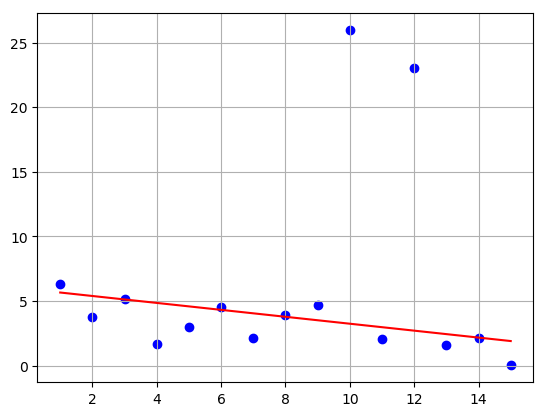

best fit of l1 cost function(include the outliers):
a:-0.2681818181818182
b:5.924545454545455


In [11]:
x = [1:15;]
y = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 26 2.06 23 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

# include the outliers
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, a)
@variable(m, b)

# l1-norm
@variable(m, t[1:15])
for i in 1:15
    @constraint(m, y[i]-a*x[i]-b <= t[i])
    @constraint(m, -t[i] <= y[i]-a*x[i]-b)
end

@objective(m, Min, sum(t))

solve(m)

a = getvalue(a)
b = getvalue(b)

println("best fit of l1 cost function(include the outliers):")
println("a:", a)
println("b:", b)

scatter(x, y, color="blue")
plot(x, a'*x.+b, color="red")
grid()

It should be fairly clear that our $l_1$ cost handles the outliers better than least of squares. It is easy to see becuase it is just a comparison of errors between $l_1$ cost and $l_2$ cost functions. 

In [12]:
error_l2 = 0
error_l1 = 0

for i in 1:13
    error_l2 = error_l2 + (yDrop[i]-a1*xDrop[i]-b1)^2
    error_l1 = error_l1 + (yDrop[i]-a*xDrop[i]-b)^2
end
println("error_l2:", error_l2)
println("error_l1:", error_l1)

error_l2:173.33798224020626
error_l1:25.691026446280993


##### Part III

Below we are plotting the Huber loss function of the convex quadratic problem.

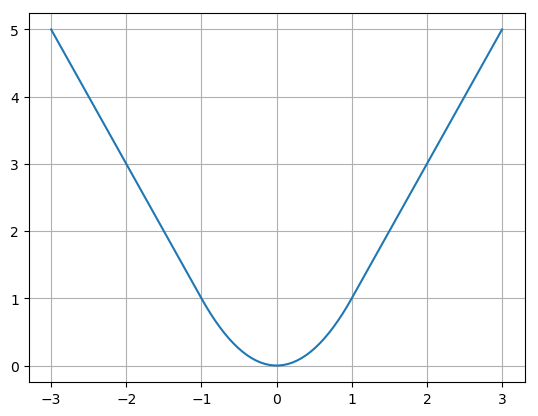

In [51]:
using JuMP, Gurobi, PyPlot

M = 1

X = range(-3, stop=3, length=100)
y = []

function HuberLoss(i)
    m = Model(solver=GurobiSolver(OutputFlag=0))

    @variable(m, v >= 0)
    @variable(m, w <= M)
    
    # Absolute value of i
    @constraint(m, i <= w+v)
    @constraint(m, -w-v <= i)
    
    @objective(m, Min, w^2 + 2*M*v)

    solve(m)
    
    return getobjectivevalue(m)
end

for i in X 
    push!(y, HuberLoss(i))
end

plot(X, y)
grid()

Then find the best linear fit to the data using Huber loss with M=1.
The optimization problem can be written as follows:
${w_i}^2 + 2M v_i 
\\ such\ that \ |y_i -a x_i -b | \leq w_i + v_i \quad for\ i=1:15 \\  v_i \geq 0 \\  w_i \leq M$


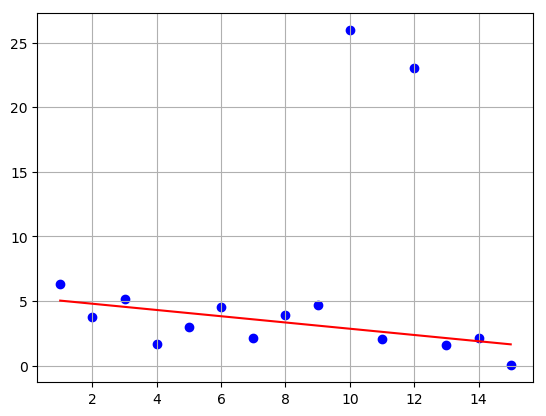

best fit of Huber loss(include the outliers):
a:-0.24172477381956128
b:5.272477100653651


In [14]:
x = [1:15;]
y = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 26 2.06 23 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

M = 1
mh = Model(solver=GurobiSolver(OutputFlag=0))

@variable(mh, a)
@variable(mh, b)
@variable(mh, v[1:15] >= 0)
@variable(mh, w[1:15] <= M)

for i in 1:15
    @constraint(mh, y[i]-a*x[i]-b <= w[i]+v[i])
    @constraint(mh, -w[i]-v[i] <= y[i]-a*x[i]-b)
end

@objective(mh, Min, sum{w[i]^2+2*M*v[i], i=1:15})

solve(mh)

a = getvalue(a)
b = getvalue(b)

println("best fit of Huber loss(include the outliers):")
println("a:", a)
println("b:", b)

scatter(x, y, color="blue")
plot(x, a'*x.+b, color="red")
grid()